### Monte Carlo Assessment of sigtimeseries.delta_outlier

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sigtimeseries as sig

### Noise Distributions

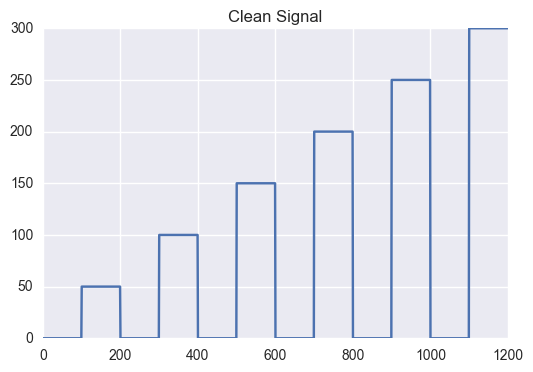

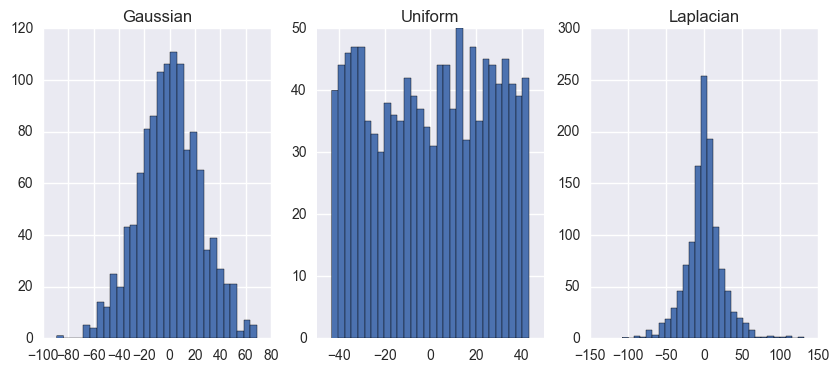

Gaussian Noise Standard Deviation: 24.5178852183
Uniform Noise Standard Deviation: 25.4241436673
Laplacian Noise Standard Deviation: 24.4321649334


In [15]:
### Signal Change Detection
testA = np.zeros(100)
testA = np.append(testA,np.ones(100)*50)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*100)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*150)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*200)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*250)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*300)

plt.plot(testA)
plt.title('Clean Signal')
plt.show()

np.random.seed(seed=1234)
noise_S=25

gauss_noise = np.random.randn(len(testA))*noise_S
uniform_noise = np.random.uniform(low=-np.sqrt(noise_S**2*12)/2,
                                  high=np.sqrt(noise_S**2*12)/2,
                                  size=len(testA))
laplace_noise = np.random.laplace(scale = noise_S/np.sqrt(2),size=len(testA))

testA_gauss =testA+gauss_noise
testA_uniform =testA+uniform_noise
testA_laplace =testA+laplace_noise

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.hist(gauss_noise,bins=30)
plt.title('Gaussian')
plt.subplot(1,3,2)
plt.title('Uniform')
plt.hist(uniform_noise,bins=30)
plt.subplot(1,3,3)
plt.title('Laplacian')
plt.hist(laplace_noise,bins=30)

plt.show()

print('Gaussian Noise Standard Deviation: '+ str(np.std(gauss_noise)))
print('Uniform Noise Standard Deviation: '+ str(np.std(uniform_noise)))
print('Laplacian Noise Standard Deviation: '+ str(np.std(laplace_noise)))

### Monte Carlo Testing 

In [16]:
### Signal Change Detection
testA = np.zeros(100)
testA = np.append(testA,np.ones(100)*50)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*100)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*150)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*200)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*250)
testA = np.append(testA,np.zeros(100))
testA = np.append(testA,np.ones(100)*300)

samples = 5000

np.random.seed(seed=1234)
noise_S=25

temp=[]

In [17]:
flatten = lambda l: [item for sublist in l for item in sublist]

### Gaussian Noise

/Users/Mikey/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Mikey/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


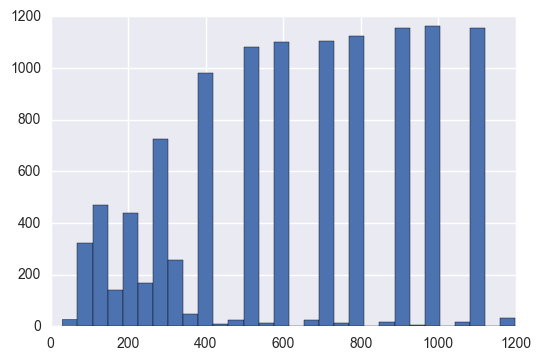

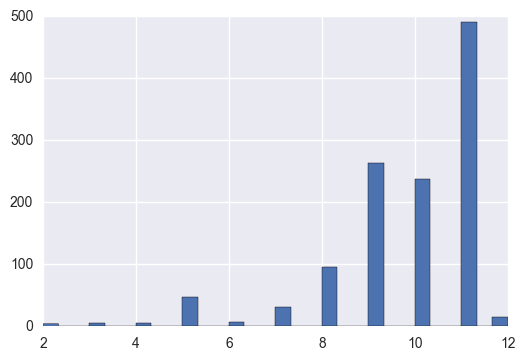

In [18]:
gauss_noise_testA = np.matrix(testA+np.random.randn(len(testA))*noise_S)
for i in range(samples-1):
    gauss_noise_testA = np.append(gauss_noise_testA,
                                    [testA+np.random.randn(len(testA))*noise_S],
                                     axis = 0)

jumps=[]
jump_count=[]
for i in range(len(testA)):
    temp=sig.delta_outlier(gauss_noise_testA[i,:].A1, 
                               window=30, 
                               advance = 60, Z=4,back=0)
    jumps.append(temp)
    jump_count.append(len(temp))

flat_gauss = flatten(jumps)
plt.hist(flat_gauss,normed=False,bins=30)
plt.show()
                           
plt.hist(jump_count,normed=False,bins=30)
plt.show()

del gauss_noise_testA

### Uniform Noise

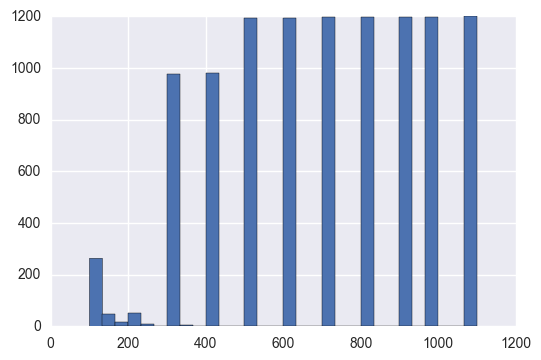

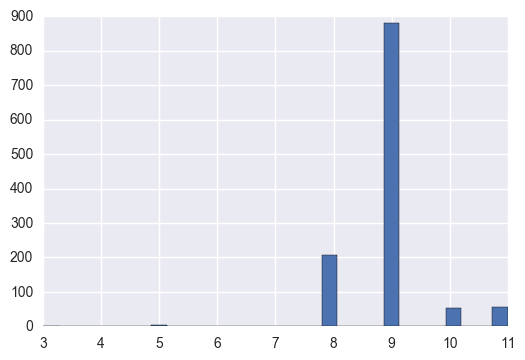

In [19]:
uniform_noise_testA=np.matrix(testA+np.random.uniform(low=-np.sqrt(noise_S**2*12)/2,
                                          high=np.sqrt(noise_S**2*12)/2,
                                          size=len(testA)))
for i in range(samples-1):
    uniform_noise_testA = np.append(uniform_noise_testA, 
                                      [testA+np.random.uniform(low=-np.sqrt(noise_S**2*12)/2,
                                          high=np.sqrt(noise_S**2*12)/2,
                                          size=len(testA))],
                                    axis=0)

jumps=[]
jump_count = []
for i in range(len(testA)):
    temp=sig.delta_outlier(uniform_noise_testA[i,:].A1, 
                               window=30, 
                               advance = 60, Z=4,back=0)
    jumps.append(temp)
    jump_count.append(len(temp))
                            
flat_uniform = flatten(jumps)
plt.hist(flat_uniform,normed=False,bins=30)
plt.show()

plt.hist(jump_count,normed=False,bins=30)
plt.show()                            
                            
del uniform_noise_testA

### Laplace Noise

/Users/Mikey/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Mikey/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


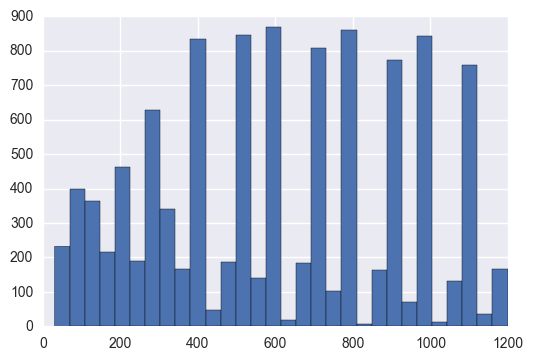

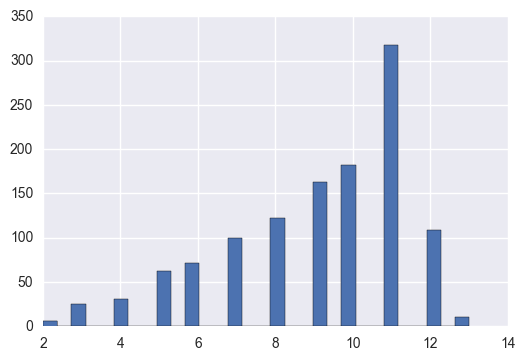

In [20]:
laplace_noise_testA = np.matrix(testA+laplace_noise)
for i in range(samples-1):
    laplace_noise_testA = np.append(laplace_noise_testA,
                                      [testA+np.random.laplace(scale = noise_S/np.sqrt(2),
                                                      size=len(testA))],
                                        axis=0)

jumps=[]
jump_count = []
for i in range(len(testA)):
    temp=sig.delta_outlier(laplace_noise_testA[i,:].A1, 
                               window=30, 
                               advance = 60, Z=4,back=0)
    jumps.append(temp)
    jump_count.append(len(temp))
                            
flat_laplace = flatten(jumps)
plt.hist(flat_laplace,normed=False,bins=30)
plt.show()
                            
plt.hist(jump_count,normed=False,bins=30)
plt.show()

del laplace_noise_testA